In [3]:
import pandas as pd
import numpy as np

In [4]:
file = pd.read_csv('fifa21_train.csv')
display(file.head(10))
file.shape

,ID,Name,Age,Nationality,Club,BP,Position,Team & Contract,Height,Weight,...,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,GK,OVA
0,184383,A. Pasche,26,Switzerland,FC Lausanne-Sport,CM,CM CDM,FC Lausanne-Sport 2015 ~ 2020,"5'9""",161lbs,...,59+1,59+1,59+1,58+1,54+1,54+1,54+1,58+1,15+1,64
1,188044,Alan Carvalho,30,China PR,Beijing Sinobo Guoan FC,ST,ST LW LM,"Beijing Sinobo Guoan FC Dec 31, 2020 On Loan","6'0""",159lbs,...,53+2,53+2,57+2,53+2,48+2,48+2,48+2,53+2,18+2,77
2,184431,S. Giovinco,33,Italy,Al Hilal,CAM,CAM CF,Al Hilal 2019 ~ 2022,"5'4""",134lbs,...,56+2,56+2,59+2,53+2,41+2,41+2,41+2,53+2,12+2,80
3,233796,J. Evans,22,Wales,Swansea City,CDM,CDM CM,Swansea City 2016 ~ 2021,"5'10""",152lbs,...,58+2,58+2,56+2,57+2,58+2,58+2,58+2,57+2,14+2,59
4,234799,Y. Demoncy,23,France,US Orléans Loiret Football,CDM,CDM CM,US Orléans Loiret Football 2018 ~ 2021,"5'11""",150lbs,...,64+2,64+2,64+2,63+2,61+2,61+2,61+2,63+2,15+2,65
5,182411,Yu Hanchao,33,China PR,Shanghai Greenland Shenhua FC,LM,LM LW RW,Shanghai Greenland Shenhua FC 2020 ~ 2023,"5'10""",154lbs,...,55+2,55+2,58+2,55+2,49+2,49+2,49+2,55+2,19+2,71
6,184392,M. Darmian,30,Italy,Parma,RB,RB LB,Parma 2019 ~ 2023,"6'0""",154lbs,...,74+2,74+2,74+2,74+2,74+2,74+2,74+2,74+2,15+2,76
7,257768,N. Mosti,22,Italy,AC Monza,LM,CAM,AC Monza 2019 ~ 2024,"5'10""",161lbs,...,52+2,52+2,52+2,50+2,46+2,46+2,46+2,50+2,15+2,60
8,225013,M. Čovilo,34,Bosnia Herzegovina,FC Lugano,CB,CDM CB,FC Lugano 2018 ~ 2021,"6'4""",192lbs,...,64+1,64+1,59+2,60+2,68+-3,68+-3,68+-3,60+2,16+2,65
9,179698,L. Grimi,35,Argentina,Club Atlético Huracán,CB,LB CB,Club Atlético Huracán 2020 ~ 2021,"6'0""",163lbs,...,66+1,66+1,65+2,65+2,68+-1,68+-1,68+-1,65+2,16+2,67


(11701, 101)

In [5]:
(file).columns

Index(['ID', 'Name', 'Age', 'Nationality', 'Club', 'BP', 'Position',
       'Team & Contract', 'Height', 'Weight',
       ...
       'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'GK', 'OVA'],
      dtype='object', length=101)

# Filter the important columns for us

In [6]:
file_filtered = file [['Name', 'Age', 'BP', 'Height', 'Weight', 'Attacking', 'Skill', 'Movement', 
                      'Power', 'Mentality', 'Defending','Goalkeeping', 'LS', 'ST', 'RS', 'LW', 'LF', 
                      'CF', 'RF', 'RW', 'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 
                    'LDM', 'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'GK','OVA']]
file_filtered
#file_filtered.head().T

,Name,Age,BP,Height,Weight,Attacking,Skill,Movement,Power,Mentality,...,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,GK,OVA
0,A. Pasche,26,CM,"5'9""",161lbs,258,286,346,306,290,...,59+1,59+1,59+1,58+1,54+1,54+1,54+1,58+1,15+1,64
1,Alan Carvalho,30,ST,"6'0""",159lbs,365,375,404,372,313,...,53+2,53+2,57+2,53+2,48+2,48+2,48+2,53+2,18+2,77
2,S. Giovinco,33,CAM,"5'4""",134lbs,336,424,424,308,332,...,56+2,56+2,59+2,53+2,41+2,41+2,41+2,53+2,12+2,80
3,J. Evans,22,CDM,"5'10""",152lbs,242,259,282,277,257,...,58+2,58+2,56+2,57+2,58+2,58+2,58+2,57+2,14+2,59
4,Y. Demoncy,23,CDM,"5'11""",150lbs,249,280,324,280,294,...,64+2,64+2,64+2,63+2,61+2,61+2,61+2,63+2,15+2,65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11696,B. Böðvarsson,25,LB,"6'1""",168lbs,224,248,333,273,266,...,60+2,60+2,63+2,63+2,61+2,61+2,61+2,63+2,16+2,65
11697,G. Gallon,27,GK,"6'1""",174lbs,84,96,237,217,101,...,26+2,26+2,25+2,24+2,26+2,26+2,26+2,24+2,69+2,70
11698,J. Flores,22,RM,"5'6""",143lbs,286,291,388,278,241,...,44+2,44+2,49+2,45+2,35+2,35+2,35+2,45+2,17+2,67
11699,Anderson Silva,26,CM,"6'2""",179lbs,254,284,198,258,241,...,68+0,68+0,66+0,64+0,60+0,60+0,60+0,64+0,25+0,68


# Dropping Duplicates

In [7]:
file_filtered = file_filtered.drop_duplicates()  # nb keep argument
print(file_filtered.shape)

(11701, 40)


# Looking for null data

In [8]:
nulls_df = pd.DataFrame(round(file_filtered.isna().sum()/len(file_filtered),4)*100)
nulls_df

,0
Name,0.0
Age,0.0
BP,0.0
Height,0.0
Weight,0.0
Attacking,0.0
Skill,0.0
Movement,0.0
Power,0.0
Mentality,0.0


# Transforming Ft and Inches to Cm

In [9]:
def convert_height(height):
    feet, inches = height.split("'")
    feet = int(feet)
    inches = int(inches.replace("\"", ""))
    height_cm = feet * 30.48 + inches * 2.54
    return height_cm

# Aplicar la función de conversión a la columna "Height" y crear una nueva columna "Height_cm"
file['Height_cm'] = file_filtered['Height'].apply(convert_height)

# Imprimir el DataFrame resultante
file['Height_cm']

0        175.26
1        182.88
2        162.56
3        177.80
4        180.34
          ...  
11696    185.42
11697    185.42
11698    167.64
11699    187.96
11700    170.18
Name: Height_cm, Length: 11701, dtype: float64

In [10]:
file_filtered["Height_in_cms"] = file_filtered['Height'].apply(convert_height)

In [11]:
file_filtered

,Name,Age,BP,Height,Weight,Attacking,Skill,Movement,Power,Mentality,...,RDM,RWB,LB,LCB,CB,RCB,RB,GK,OVA,Height_in_cms
0,A. Pasche,26,CM,"5'9""",161lbs,258,286,346,306,290,...,59+1,59+1,58+1,54+1,54+1,54+1,58+1,15+1,64,175.26
1,Alan Carvalho,30,ST,"6'0""",159lbs,365,375,404,372,313,...,53+2,57+2,53+2,48+2,48+2,48+2,53+2,18+2,77,182.88
2,S. Giovinco,33,CAM,"5'4""",134lbs,336,424,424,308,332,...,56+2,59+2,53+2,41+2,41+2,41+2,53+2,12+2,80,162.56
3,J. Evans,22,CDM,"5'10""",152lbs,242,259,282,277,257,...,58+2,56+2,57+2,58+2,58+2,58+2,57+2,14+2,59,177.80
4,Y. Demoncy,23,CDM,"5'11""",150lbs,249,280,324,280,294,...,64+2,64+2,63+2,61+2,61+2,61+2,63+2,15+2,65,180.34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11696,B. Böðvarsson,25,LB,"6'1""",168lbs,224,248,333,273,266,...,60+2,63+2,63+2,61+2,61+2,61+2,63+2,16+2,65,185.42
11697,G. Gallon,27,GK,"6'1""",174lbs,84,96,237,217,101,...,26+2,25+2,24+2,26+2,26+2,26+2,24+2,69+2,70,185.42
11698,J. Flores,22,RM,"5'6""",143lbs,286,291,388,278,241,...,44+2,49+2,45+2,35+2,35+2,35+2,45+2,17+2,67,167.64
11699,Anderson Silva,26,CM,"6'2""",179lbs,254,284,198,258,241,...,68+0,66+0,64+0,60+0,60+0,60+0,64+0,25+0,68,187.96


In [12]:
file_filtered = file_filtered.drop(["Height"], axis=1)
file_filtered

,Name,Age,BP,Weight,Attacking,Skill,Movement,Power,Mentality,Defending,...,RDM,RWB,LB,LCB,CB,RCB,RB,GK,OVA,Height_in_cms
0,A. Pasche,26,CM,161lbs,258,286,346,306,290,148,...,59+1,59+1,58+1,54+1,54+1,54+1,58+1,15+1,64,175.26
1,Alan Carvalho,30,ST,159lbs,365,375,404,372,313,77,...,53+2,57+2,53+2,48+2,48+2,48+2,53+2,18+2,77,182.88
2,S. Giovinco,33,CAM,134lbs,336,424,424,308,332,80,...,56+2,59+2,53+2,41+2,41+2,41+2,53+2,12+2,80,162.56
3,J. Evans,22,CDM,152lbs,242,259,282,277,257,168,...,58+2,56+2,57+2,58+2,58+2,58+2,57+2,14+2,59,177.80
4,Y. Demoncy,23,CDM,150lbs,249,280,324,280,294,185,...,64+2,64+2,63+2,61+2,61+2,61+2,63+2,15+2,65,180.34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11696,B. Böðvarsson,25,LB,168lbs,224,248,333,273,266,184,...,60+2,63+2,63+2,61+2,61+2,61+2,63+2,16+2,65,185.42
11697,G. Gallon,27,GK,174lbs,84,96,237,217,101,41,...,26+2,25+2,24+2,26+2,26+2,26+2,24+2,69+2,70,185.42
11698,J. Flores,22,RM,143lbs,286,291,388,278,241,62,...,44+2,49+2,45+2,35+2,35+2,35+2,45+2,17+2,67,167.64
11699,Anderson Silva,26,CM,179lbs,254,284,198,258,241,113,...,68+0,66+0,64+0,60+0,60+0,60+0,64+0,25+0,68,187.96


# Converting weight to KG

In [13]:
def convert_weight(weight):
    
    weight =weight.replace("lbs", "")
    return float(weight)*0.45

file_filtered["Weight_in_kg"] = file_filtered['Weight'].apply(convert_weight)

In [14]:
file_filtered = file_filtered.drop(["Weight"], axis=1)
file_filtered

,Name,Age,BP,Attacking,Skill,Movement,Power,Mentality,Defending,Goalkeeping,...,RWB,LB,LCB,CB,RCB,RB,GK,OVA,Height_in_cms,Weight_in_kg
0,A. Pasche,26,CM,258,286,346,306,290,148,48,...,59+1,58+1,54+1,54+1,54+1,58+1,15+1,64,175.26,72.45
1,Alan Carvalho,30,ST,365,375,404,372,313,77,55,...,57+2,53+2,48+2,48+2,48+2,53+2,18+2,77,182.88,71.55
2,S. Giovinco,33,CAM,336,424,424,308,332,80,21,...,59+2,53+2,41+2,41+2,41+2,53+2,12+2,80,162.56,60.30
3,J. Evans,22,CDM,242,259,282,277,257,168,42,...,56+2,57+2,58+2,58+2,58+2,57+2,14+2,59,177.80,68.40
4,Y. Demoncy,23,CDM,249,280,324,280,294,185,52,...,64+2,63+2,61+2,61+2,61+2,63+2,15+2,65,180.34,67.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11696,B. Böðvarsson,25,LB,224,248,333,273,266,184,61,...,63+2,63+2,61+2,61+2,61+2,63+2,16+2,65,185.42,75.60
11697,G. Gallon,27,GK,84,96,237,217,101,41,347,...,25+2,24+2,26+2,26+2,26+2,24+2,69+2,70,185.42,78.30
11698,J. Flores,22,RM,286,291,388,278,241,62,57,...,49+2,45+2,35+2,35+2,35+2,45+2,17+2,67,167.64,64.35
11699,Anderson Silva,26,CM,254,284,198,258,241,113,81,...,66+0,64+0,60+0,60+0,60+0,64+0,25+0,68,187.96,80.55


# Reorder columns

In [15]:
height_column = file_filtered.pop('Height_in_cms')
file_filtered.insert(2, 'Height_in_cms', height_column)

weight_column = file_filtered.pop('Weight_in_kg')
file_filtered.insert(3, 'Weight_in_kg', weight_column)

# Print the updated dataframe
display(file_filtered)

,Name,Age,Height_in_cms,Weight_in_kg,BP,Attacking,Skill,Movement,Power,Mentality,...,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,GK,OVA
0,A. Pasche,26,175.26,72.45,CM,258,286,346,306,290,...,59+1,59+1,59+1,58+1,54+1,54+1,54+1,58+1,15+1,64
1,Alan Carvalho,30,182.88,71.55,ST,365,375,404,372,313,...,53+2,53+2,57+2,53+2,48+2,48+2,48+2,53+2,18+2,77
2,S. Giovinco,33,162.56,60.30,CAM,336,424,424,308,332,...,56+2,56+2,59+2,53+2,41+2,41+2,41+2,53+2,12+2,80
3,J. Evans,22,177.80,68.40,CDM,242,259,282,277,257,...,58+2,58+2,56+2,57+2,58+2,58+2,58+2,57+2,14+2,59
4,Y. Demoncy,23,180.34,67.50,CDM,249,280,324,280,294,...,64+2,64+2,64+2,63+2,61+2,61+2,61+2,63+2,15+2,65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11696,B. Böðvarsson,25,185.42,75.60,LB,224,248,333,273,266,...,60+2,60+2,63+2,63+2,61+2,61+2,61+2,63+2,16+2,65
11697,G. Gallon,27,185.42,78.30,GK,84,96,237,217,101,...,26+2,26+2,25+2,24+2,26+2,26+2,26+2,24+2,69+2,70
11698,J. Flores,22,167.64,64.35,RM,286,291,388,278,241,...,44+2,44+2,49+2,45+2,35+2,35+2,35+2,45+2,17+2,67
11699,Anderson Silva,26,187.96,80.55,CM,254,284,198,258,241,...,68+0,68+0,66+0,64+0,60+0,60+0,60+0,64+0,25+0,68


# Remove the + in the columns

In [16]:
columns_to_convert = ["LS","ST","RS","LW","LF","CF","RF","RW","LAM","CAM","RAM","LM","LCM","CM","RCM",
                      "RM","LWB","LDM","CDM","RDM","RWB","LB","LCB","CB","RCB","RB","GK" ] 

def convert_stats(x):
    if isinstance(x, int):
        return x
    else:
        return int(x[0:x.index("+")])


for column in columns_to_convert:
    file_filtered[column] = file_filtered[column].apply(convert_stats)
display(file_filtered)

,Name,Age,Height_in_cms,Weight_in_kg,BP,Attacking,Skill,Movement,Power,Mentality,...,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,GK,OVA
0,A. Pasche,26,175.26,72.45,CM,258,286,346,306,290,...,59,59,59,58,54,54,54,58,15,64
1,Alan Carvalho,30,182.88,71.55,ST,365,375,404,372,313,...,53,53,57,53,48,48,48,53,18,77
2,S. Giovinco,33,162.56,60.30,CAM,336,424,424,308,332,...,56,56,59,53,41,41,41,53,12,80
3,J. Evans,22,177.80,68.40,CDM,242,259,282,277,257,...,58,58,56,57,58,58,58,57,14,59
4,Y. Demoncy,23,180.34,67.50,CDM,249,280,324,280,294,...,64,64,64,63,61,61,61,63,15,65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11696,B. Böðvarsson,25,185.42,75.60,LB,224,248,333,273,266,...,60,60,63,63,61,61,61,63,16,65
11697,G. Gallon,27,185.42,78.30,GK,84,96,237,217,101,...,26,26,25,24,26,26,26,24,69,70
11698,J. Flores,22,167.64,64.35,RM,286,291,388,278,241,...,44,44,49,45,35,35,35,45,17,67
11699,Anderson Silva,26,187.96,80.55,CM,254,284,198,258,241,...,68,68,66,64,60,60,60,64,25,68


In [17]:
file_filtered.head().T

,0,1,2,3,4
Name,A. Pasche,Alan Carvalho,S. Giovinco,J. Evans,Y. Demoncy
Age,26,30,33,22,23
Height_in_cms,175.26,182.88,162.56,177.8,180.34
Weight_in_kg,72.45,71.55,60.3,68.4,67.5
BP,CM,ST,CAM,CDM,CDM
Attacking,258,365,336,242,249
Skill,286,375,424,259,280
Movement,346,404,424,282,324
Power,306,372,308,277,280
Mentality,290,313,332,257,294


# Check correlation by heatmap

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\Andrea\AppData\Local\Temp\ipykernel_22172\3214528529.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = file_filtered.corr()


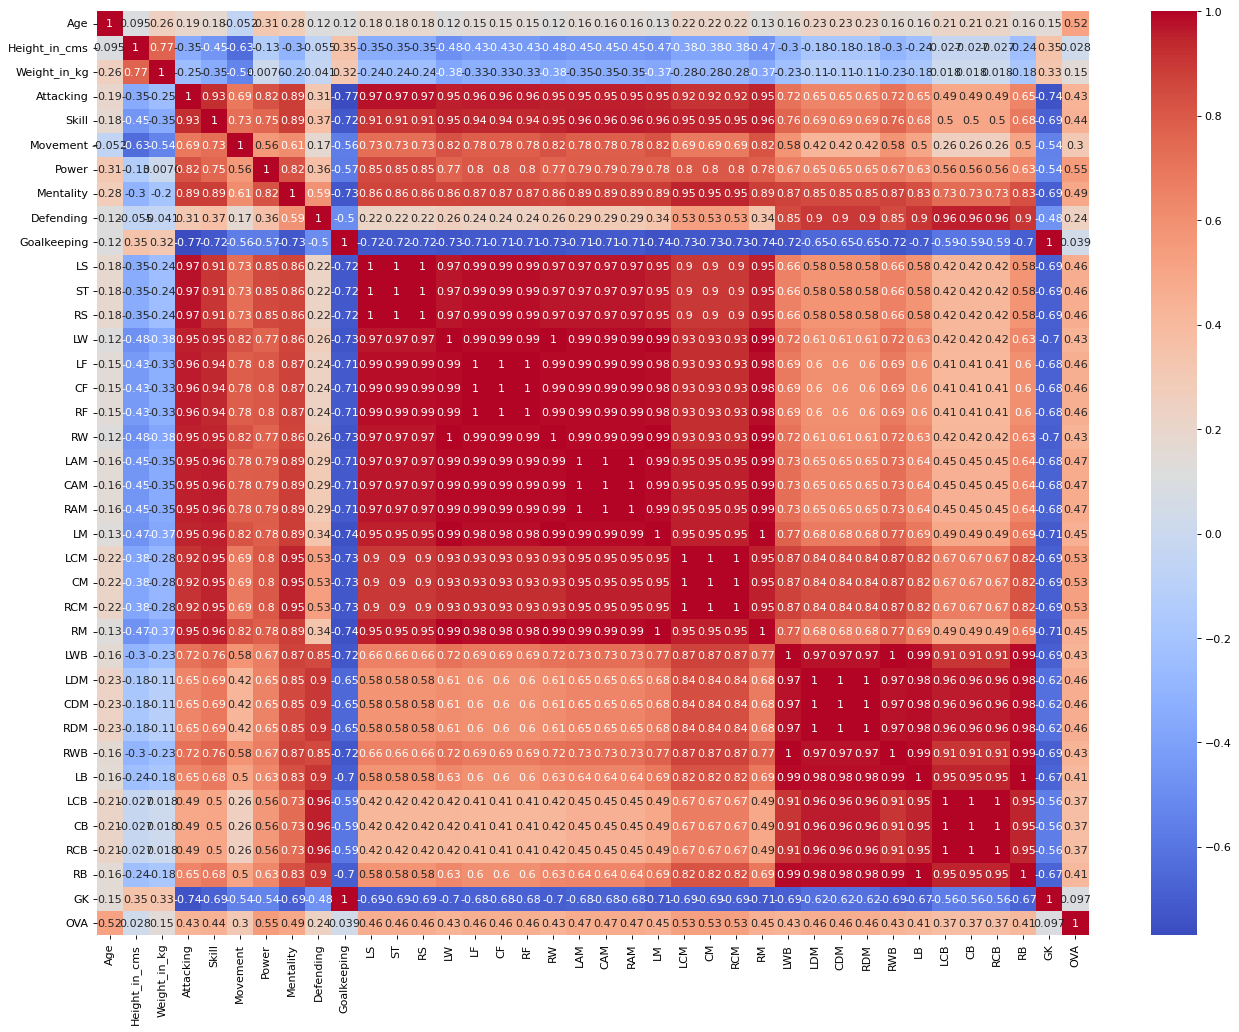

In [19]:
correlation_matrix = file_filtered.corr()

plt.figure(figsize=(20, 15), dpi =80)  # Set the figure size
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

In [20]:
file_filtered1 = file_filtered [['Name', 'Age', 'Height_in_cms', 'Weight_in_kg', 'BP', 'Attacking', 'Skill', 'Movement', 
                      'Power', 'Mentality', 'Defending','Goalkeeping', 'ST', 
                      'CF', 'RW', 'CAM', 'CM', 'RM', 'CDM', 'RWB', 'CB', 'RB','OVA']]
file_filtered1

,Name,Age,Height_in_cms,Weight_in_kg,BP,Attacking,Skill,Movement,Power,Mentality,...,CF,RW,CAM,CM,RM,CDM,RWB,CB,RB,OVA
0,A. Pasche,26,175.26,72.45,CM,258,286,346,306,290,...,62,61,63,63,63,59,59,54,58,64
1,Alan Carvalho,30,182.88,71.55,ST,365,375,404,372,313,...,77,77,76,68,76,53,57,48,53,77
2,S. Giovinco,33,162.56,60.30,CAM,336,424,424,308,332,...,79,80,80,74,79,56,59,41,53,80
3,J. Evans,22,177.80,68.40,CDM,242,259,282,277,257,...,51,51,53,56,53,58,56,58,57,59
4,Y. Demoncy,23,180.34,67.50,CDM,249,280,324,280,294,...,59,59,61,63,62,64,64,61,63,65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11696,B. Böðvarsson,25,185.42,75.60,LB,224,248,333,273,266,...,52,55,54,56,58,60,63,61,63,65
11697,G. Gallon,27,185.42,78.30,GK,84,96,237,217,101,...,26,24,24,25,25,26,25,26,24,70
11698,J. Flores,22,167.64,64.35,RM,286,291,388,278,241,...,65,67,65,58,66,44,49,35,45,67
11699,Anderson Silva,26,187.96,80.55,CM,254,284,198,258,241,...,68,71,72,71,71,68,66,60,64,68


In [21]:
file_filtered1.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,11701.0,25.270490,4.957640,16.00,21.00,25.00,29.00,43.00
Height_in_cms,11701.0,181.225234,6.913566,154.94,175.26,180.34,185.42,205.74
Weight_in_kg,11701.0,74.512093,7.122727,52.65,69.30,74.25,79.20,109.35
Attacking,11701.0,258.482181,72.267012,33.00,232.00,271.00,306.00,437.00
Skill,11701.0,266.497222,76.835287,43.00,232.00,279.00,319.00,470.00
Movement,11701.0,322.617383,55.330054,113.00,294.00,331.00,361.00,464.00
Power,11701.0,302.083326,49.697749,133.00,271.00,308.00,339.00,444.00
Mentality,11701.0,261.704982,62.935298,55.00,235.00,269.00,304.00,414.00
Defending,11701.0,140.674558,61.599006,17.00,83.00,156.00,194.00,267.00
Goalkeeping,11701.0,77.726946,81.221525,12.00,48.00,53.00,59.00,439.00


In [22]:
file_filtered1.to_csv("cleaned_fifa21_train.csv", index = False)

C:\Users\Andrea\AppData\Local\Temp\ipykernel_22172\2992396405.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = file_filtered1.corr()


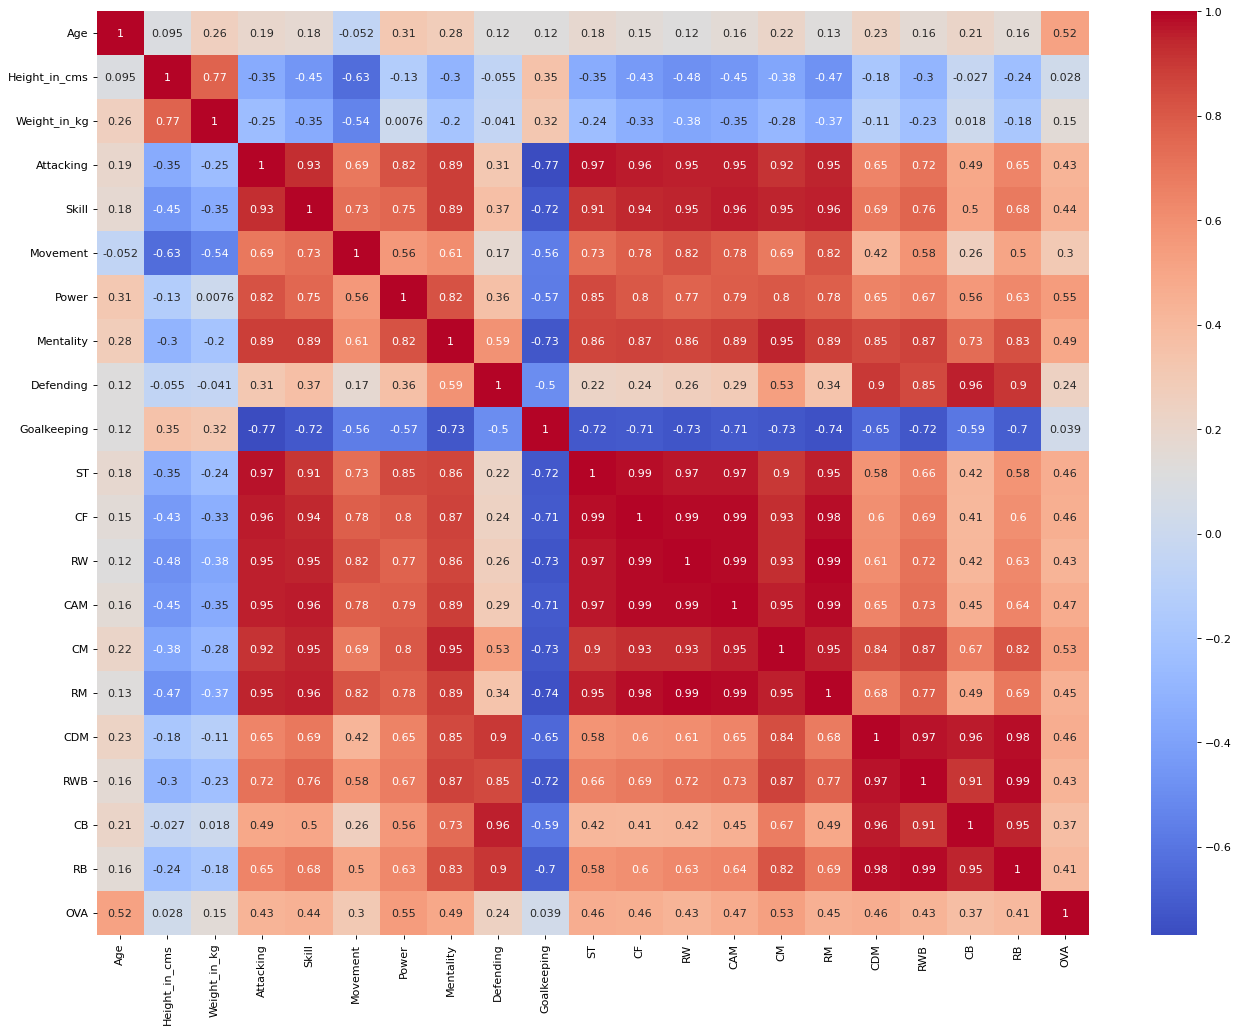

In [23]:
correlation_matrix = file_filtered1.corr()

plt.figure(figsize=(20, 15), dpi =80)  # Set the figure size
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

In [24]:
display(correlation_matrix)

,Age,Height_in_cms,Weight_in_kg,Attacking,Skill,Movement,Power,Mentality,Defending,Goalkeeping,...,CF,RW,CAM,CM,RM,CDM,RWB,CB,RB,OVA
Age,1.000000,0.095369,0.257338,0.191137,0.175981,-0.051802,0.314169,0.278804,0.117902,0.120656,...,0.148203,0.117932,0.156023,0.216063,0.127516,0.229680,0.159610,0.212682,0.156077,0.519799
Height_in_cms,0.095369,1.000000,0.768096,-0.350153,-0.454377,-0.634614,-0.129197,-0.301619,-0.054541,0.349292,...,-0.434237,-0.482386,-0.452918,-0.382284,-0.473114,-0.176873,-0.297543,-0.026750,-0.236556,0.028210
Weight_in_kg,0.257338,0.768096,1.000000,-0.250868,-0.352398,-0.536489,0.007573,-0.197294,-0.040950,0.321449,...,-0.328999,-0.379594,-0.348551,-0.283494,-0.372395,-0.111618,-0.230207,0.017899,-0.180391,0.149397
Attacking,0.191137,-0.350153,-0.250868,1.000000,0.928584,0.692493,0.823527,0.888604,0.311367,-0.769826,...,0.962657,0.952856,0.954244,0.915054,0.949149,0.645383,0.715847,0.489982,0.645549,0.433092
Skill,0.175981,-0.454377,-0.352398,0.928584,1.000000,0.725776,0.753061,0.885893,0.370432,-0.716263,...,0.944536,0.950774,0.961897,0.949321,0.958432,0.691593,0.759537,0.499132,0.682813,0.442666
Movement,-0.051802,-0.634614,-0.536489,0.692493,0.725776,1.000000,0.560489,0.610661,0.174070,-0.563037,...,0.783538,0.823968,0.782051,0.688793,0.817911,0.420956,0.580126,0.257112,0.504868,0.304496
Power,0.314169,-0.129197,0.007573,0.823527,0.753061,0.560489,1.000000,0.823428,0.361816,-0.573683,...,0.802142,0.770205,0.786788,0.802328,0.779763,0.652863,0.674442,0.561110,0.630567,0.547839
Mentality,0.278804,-0.301619,-0.197294,0.888604,0.885893,0.610661,0.823428,1.000000,0.587906,-0.727656,...,0.869660,0.861782,0.886395,0.948221,0.886809,0.851205,0.869664,0.733252,0.828866,0.494590
Defending,0.117902,-0.054541,-0.040950,0.311367,0.370432,0.174070,0.361816,0.587906,1.000000,-0.496275,...,0.238349,0.264763,0.290739,0.534867,0.341027,0.897364,0.849449,0.958060,0.903396,0.243725
Goalkeeping,0.120656,0.349292,0.321449,-0.769826,-0.716263,-0.563037,-0.573683,-0.727656,-0.496275,1.000000,...,-0.714233,-0.731027,-0.712488,-0.725802,-0.744081,-0.653070,-0.723001,-0.591685,-0.695862,0.038584


In [25]:
file_filtered1.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,11701.0,25.270490,4.957640,16.00,21.00,25.00,29.00,43.00
Height_in_cms,11701.0,181.225234,6.913566,154.94,175.26,180.34,185.42,205.74
Weight_in_kg,11701.0,74.512093,7.122727,52.65,69.30,74.25,79.20,109.35
Attacking,11701.0,258.482181,72.267012,33.00,232.00,271.00,306.00,437.00
Skill,11701.0,266.497222,76.835287,43.00,232.00,279.00,319.00,470.00
Movement,11701.0,322.617383,55.330054,113.00,294.00,331.00,361.00,464.00
Power,11701.0,302.083326,49.697749,133.00,271.00,308.00,339.00,444.00
Mentality,11701.0,261.704982,62.935298,55.00,235.00,269.00,304.00,414.00
Defending,11701.0,140.674558,61.599006,17.00,83.00,156.00,194.00,267.00
Goalkeeping,11701.0,77.726946,81.221525,12.00,48.00,53.00,59.00,439.00


In [26]:
X = file_filtered1.copy() # features
X = X.drop(["OVA", "Name"], axis = 1)
X_num = X.select_dtypes(include = np.number)
X_cat = X.select_dtypes(include = object)

y = file_filtered1["OVA"] # target

In [27]:
display(X.head())
display(X_num.head())
display(X_cat.head())
display(y.head())

,Age,Height_in_cms,Weight_in_kg,BP,Attacking,Skill,Movement,Power,Mentality,Defending,...,ST,CF,RW,CAM,CM,RM,CDM,RWB,CB,RB
0,26,175.26,72.45,CM,258,286,346,306,290,148,...,58,62,61,63,63,63,59,59,54,58
1,30,182.88,71.55,ST,365,375,404,372,313,77,...,77,77,77,76,68,76,53,57,48,53
2,33,162.56,60.30,CAM,336,424,424,308,332,80,...,73,79,80,80,74,79,56,59,41,53
3,22,177.80,68.40,CDM,242,259,282,277,257,168,...,50,51,51,53,56,53,58,56,58,57
4,23,180.34,67.50,CDM,249,280,324,280,294,185,...,56,59,59,61,63,62,64,64,61,63


,Age,Height_in_cms,Weight_in_kg,Attacking,Skill,Movement,Power,Mentality,Defending,Goalkeeping,ST,CF,RW,CAM,CM,RM,CDM,RWB,CB,RB
0,26,175.26,72.45,258,286,346,306,290,148,48,58,62,61,63,63,63,59,59,54,58
1,30,182.88,71.55,365,375,404,372,313,77,55,77,77,77,76,68,76,53,57,48,53
2,33,162.56,60.30,336,424,424,308,332,80,21,73,79,80,80,74,79,56,59,41,53
3,22,177.80,68.40,242,259,282,277,257,168,42,50,51,51,53,56,53,58,56,58,57
4,23,180.34,67.50,249,280,324,280,294,185,52,56,59,59,61,63,62,64,64,61,63


,BP
0,CM
1,ST
2,CAM
3,CDM
4,CDM


0    64
1    77
2    80
3    59
4    65
Name: OVA, dtype: int64

In [31]:
X_num.shape

(11701, 20)

# Normalization

In [32]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder

In [35]:
from sklearn.preprocessing import MinMaxScaler
transformer = MinMaxScaler().fit(X_num)
x_normalized = transformer.transform(X_num)   
print(x_normalized.shape)
x_normalized 
x_normalized2 = pd.DataFrame(x_normalized, columns=X_num.columns)
x_normalized2


(11701, 20)


,Age,Height_in_cms,Weight_in_kg,Attacking,Skill,Movement,Power,Mentality,Defending,Goalkeeping,ST,CF,RW,CAM,CM,RM,CDM,RWB,CB,RB
0,0.370370,0.40,0.349206,0.556931,0.569087,0.663818,0.556270,0.654596,0.524,0.084309,0.565789,0.602564,0.602564,0.610390,0.643836,0.631579,0.614286,0.625000,0.527778,0.637681
1,0.518519,0.55,0.333333,0.821782,0.777518,0.829060,0.768489,0.718663,0.240,0.100703,0.815789,0.794872,0.807692,0.779221,0.712329,0.802632,0.528571,0.597222,0.444444,0.565217
2,0.629630,0.15,0.134921,0.750000,0.892272,0.886040,0.562701,0.771588,0.252,0.021077,0.763158,0.820513,0.846154,0.831169,0.794521,0.842105,0.571429,0.625000,0.347222,0.565217
3,0.222222,0.45,0.277778,0.517327,0.505855,0.481481,0.463023,0.562674,0.604,0.070258,0.460526,0.461538,0.474359,0.480519,0.547945,0.500000,0.600000,0.583333,0.583333,0.623188
4,0.259259,0.50,0.261905,0.534653,0.555035,0.601140,0.472669,0.665738,0.672,0.093677,0.539474,0.564103,0.576923,0.584416,0.643836,0.618421,0.685714,0.694444,0.625000,0.710145
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11696,0.333333,0.60,0.404762,0.472772,0.480094,0.626781,0.450161,0.587744,0.668,0.114754,0.434211,0.474359,0.525641,0.493506,0.547945,0.565789,0.628571,0.680556,0.625000,0.710145
11697,0.407407,0.60,0.452381,0.126238,0.124122,0.353276,0.270096,0.128134,0.096,0.784543,0.171053,0.141026,0.128205,0.103896,0.123288,0.131579,0.142857,0.152778,0.138889,0.144928
11698,0.222222,0.25,0.206349,0.626238,0.580796,0.783476,0.466238,0.518106,0.180,0.105386,0.618421,0.641026,0.679487,0.636364,0.575342,0.671053,0.400000,0.486111,0.263889,0.449275
11699,0.370370,0.65,0.492063,0.547030,0.564403,0.242165,0.401929,0.518106,0.384,0.161593,0.697368,0.679487,0.730769,0.727273,0.753425,0.736842,0.742857,0.722222,0.611111,0.724638


In [37]:
X_num.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,11701.0,25.270490,4.957640,16.00,21.00,25.00,29.00,43.00
Height_in_cms,11701.0,181.225234,6.913566,154.94,175.26,180.34,185.42,205.74
Weight_in_kg,11701.0,74.512093,7.122727,52.65,69.30,74.25,79.20,109.35
Attacking,11701.0,258.482181,72.267012,33.00,232.00,271.00,306.00,437.00
Skill,11701.0,266.497222,76.835287,43.00,232.00,279.00,319.00,470.00
Movement,11701.0,322.617383,55.330054,113.00,294.00,331.00,361.00,464.00
Power,11701.0,302.083326,49.697749,133.00,271.00,308.00,339.00,444.00
Mentality,11701.0,261.704982,62.935298,55.00,235.00,269.00,304.00,414.00
Defending,11701.0,140.674558,61.599006,17.00,83.00,156.00,194.00,267.00
Goalkeeping,11701.0,77.726946,81.221525,12.00,48.00,53.00,59.00,439.00


# Encoding

In [38]:
#X_cat = data2.select_dtypes(include = object)
X_cat = X.select_dtypes(include = object)

In [39]:
X_cat.head(20)

,BP
0,CM
1,ST
2,CAM
3,CDM
4,CDM
5,LM
6,RB
7,LM
8,CB
9,CB


In [40]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(drop='first').fit(X_cat)

cols = encoder.get_feature_names_out(input_features=X_cat.columns)

X_cat_encode = pd.DataFrame(encoder.transform(X_cat).toarray(),columns=cols)

X_cat_encode.head()


,BP_CB,BP_CDM,BP_CF,BP_CM,BP_GK,BP_LB,BP_LM,BP_LW,BP_LWB,BP_RB,BP_RM,BP_RW,BP_RWB,BP_ST
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [41]:
X_cat_encode.shape

(11701, 14)

In [42]:
X = pd.concat([x_normalized2, X_cat_encode ], axis=1)
display(X)

,Age,Height_in_cms,Weight_in_kg,Attacking,Skill,Movement,Power,Mentality,Defending,Goalkeeping,...,BP_GK,BP_LB,BP_LM,BP_LW,BP_LWB,BP_RB,BP_RM,BP_RW,BP_RWB,BP_ST
0,0.370370,0.40,0.349206,0.556931,0.569087,0.663818,0.556270,0.654596,0.524,0.084309,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.518519,0.55,0.333333,0.821782,0.777518,0.829060,0.768489,0.718663,0.240,0.100703,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.629630,0.15,0.134921,0.750000,0.892272,0.886040,0.562701,0.771588,0.252,0.021077,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.222222,0.45,0.277778,0.517327,0.505855,0.481481,0.463023,0.562674,0.604,0.070258,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.259259,0.50,0.261905,0.534653,0.555035,0.601140,0.472669,0.665738,0.672,0.093677,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11696,0.333333,0.60,0.404762,0.472772,0.480094,0.626781,0.450161,0.587744,0.668,0.114754,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11697,0.407407,0.60,0.452381,0.126238,0.124122,0.353276,0.270096,0.128134,0.096,0.784543,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11698,0.222222,0.25,0.206349,0.626238,0.580796,0.783476,0.466238,0.518106,0.180,0.105386,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
11699,0.370370,0.65,0.492063,0.547030,0.564403,0.242165,0.401929,0.518106,0.384,0.161593,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Lineal regression

In [44]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [45]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(9360, 34)
(2341, 34)
(9360,)
(2341,)


In [46]:
X_train.head()

,Age,Height_in_cms,Weight_in_kg,Attacking,Skill,Movement,Power,Mentality,Defending,Goalkeeping,...,BP_GK,BP_LB,BP_LM,BP_LW,BP_LWB,BP_RB,BP_RM,BP_RW,BP_RWB,BP_ST
7301,0.407407,0.30,0.365079,0.631188,0.590164,0.715100,0.768489,0.646240,0.728,0.081967,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
341,0.592593,0.45,0.380952,0.720297,0.725995,0.603989,0.630225,0.813370,0.828,0.103044,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2101,0.259259,0.80,0.626984,0.477723,0.367681,0.390313,0.437299,0.481894,0.736,0.079625,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2437,0.037037,0.45,0.246032,0.457921,0.470726,0.606838,0.356913,0.454039,0.336,0.096019,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4759,0.629630,0.60,0.555556,0.118812,0.114754,0.185185,0.064309,0.158774,0.108,0.714286,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [47]:
y_train.head()

7301    71
341     72
2101    65
2437    54
4759    63
Name: OVA, dtype: int64

In [48]:
from sklearn import linear_model
lm = linear_model.LinearRegression()
lm.fit(X_train,y_train)


LinearRegression()

In [49]:
from sklearn.metrics import r2_score
predictions = lm.predict(X_train)
r2_score(y_train, predictions)

0.8419583033053593

In [50]:
predictions_test = lm.predict(X_test)
r2_score(y_test, predictions_test)

0.8329723153142781

In [51]:
y_test[:5]

1873    79
2852    72
4609    66
9747    58
7443    70
Name: OVA, dtype: int64

In [52]:
predictions_test[:5]

array([78.06735658, 72.95395514, 67.57278696, 59.82779178, 68.52718364])

In [53]:
from sklearn.metrics import mean_squared_error
mse=mean_squared_error(y_test,predictions_test)
mse

7.835626325613443

In [54]:
rmse = np.sqrt(mean_squared_error(y_test,predictions_test))
rmse

2.7992188777609806

In [55]:
y_test.mean()

66.87654848355403

In [80]:
#Comparing the OVA mean for our predictions and the original target. There are pretty similar
mean_OVA = file_filtered1['OVA'].mean()
print(mean_OVA)

y_test.mean()

66.92197248098454


66.87654848355403

# Model Validation

In [56]:
from sklearn.metrics import mean_absolute_error, r2_score

In [57]:
mae = mean_absolute_error(y_test, predictions_test)
print(mae)

2.1582729793398685


In [58]:
r2 = r2_score(y_test, predictions_test)
r2

0.8329723153142781

In [59]:
mse=mean_squared_error(y_test,predictions_test)
mse

7.835626325613443

In [60]:
import math
rmse = math.sqrt(mse)
print(rmse)

2.7992188777609806


In [61]:
#Save file
file_filtered1.to_csv("Model_fifa21_train.csv", index = False)

In [70]:
file_filtered1.shape

(11701, 23)

# INSIGHT: R2, MAE and RMSE indicate that the quality of the model is higer. r2 value is more that 80% and MAE is a lower valor which means that the model is working good. 